# Over Sampling ADASYN

# Tugas:

1. Download dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli
2. Simpan didatabase MySQL
3. Tampilkan data dalam scatter plot  menggunakan PCA.
   PCA mentransformasi data menjadi dimensi rendah (2)
4. Lakukan penyeimbangan data menggunakan ADASYN
5. Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

# 1. Koneksi Database dan Pengambilan Data
- Menghubungkan ke database MySQL yang berisi dataset Iris

- Mengambil seluruh data dari tabel "ecoli" menggunakan pandas

- Menampilkan isi dataset untuk memahami struktur data

In [ ]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
  host='127.0.0.1',
  user='root',
  password='',
  database='ecoli'
)

df = pd.read_sql("SELECT * FROM ecoli", conn)
print("\nIsi tabel ecoli:")
print(df)


Isi tabel ecoli:
      id protein_name   mcg   gvh   lip  chg   aac  alm1  alm2  \
0      1    AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   
1      2   ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   
2      3   ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   
3      4   ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   
4      5    ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   
..   ...          ...   ...   ...   ...  ...   ...   ...   ...   
331  332   TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30   
332  333   UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32   
333  334   USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38   
334  335   XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37   
335  336   YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52   

    localization_class  
0                   cp  
1                   cp  
2                   cp  
3                   cp  
4                   cp  
..                 ...  
331           

C:\Users\Syafiq Azizi\AppData\Local\Temp\ipykernel_28368\693973897.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM ecoli", conn)


# 2. Analisis Distribusi Kelas
- Lakukan analisis awal untuk mengidentifikasi ketidakseimbangan kelas:

- Menghitung jumlah sampel untuk setiap spesies menggunakan value_counts()

- Mengidentifikasi kelas minoritas dan mayoritas

- Hasil ini akan menunjukkan apakah dataset memerlukan penyeimbangan

In [ ]:
localization_class = df['localization_class'].value_counts()
print("Jumlah pada tiap kelas di kolom localization_class:")
print(localization_class)

Jumlah pada tiap kelas di kolom localization_class:
localization_class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64


# 3. Scatter Plot dengan PCA dan LDA
Kita turunkan dimensi menjadi 2 menggunakan PCA, lalu divisualisasikan:

explained variance ratio (first two components): [9.99985274e-01 8.13542487e-06]


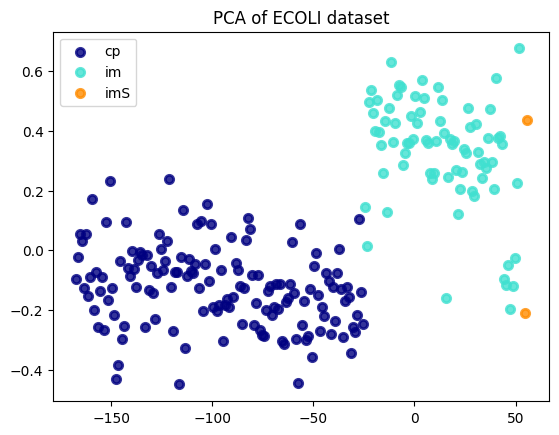

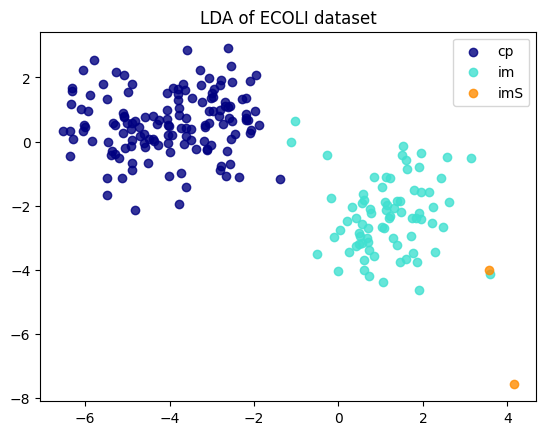

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop(columns=["protein_name", "localization_class"]).values
y = df["localization_class"].astype("category").cat.codes.values
target_names = df["localization_class"].unique()

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of ECOLI dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of ECOLI dataset")

plt.show()

# 4. Persiapan Data untuk ADASYN

# Tujuan:
Mengidentifikasi kelas minoritas yang perlu didrop

Mempersiapkan format data yang sesuai untuk algoritma ADASYN

In [ ]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 143, 1: 77, 2: 2, 3: 2, 4: 35, 5: 20, 6: 5, 7: 52}


In [ ]:
import pandas as pd

df = pd.DataFrame(X)
df['label'] = y

min_samples = 5

valid_classes = df['label'].value_counts()[df['label'].value_counts() >= min_samples].index

df_filtered = df[df['label'].isin(valid_classes)]

X_filtered = df_filtered.drop('label', axis=1).values
y_filtered = df_filtered['label'].values

print("Distribusi kelas setelah drop:", dict(zip(*np.unique(y_filtered, return_counts=True))))


Distribusi kelas setelah drop: {0: 143, 1: 77, 4: 35, 5: 20, 6: 5, 7: 52}


# 5. Implementasi ADASYN

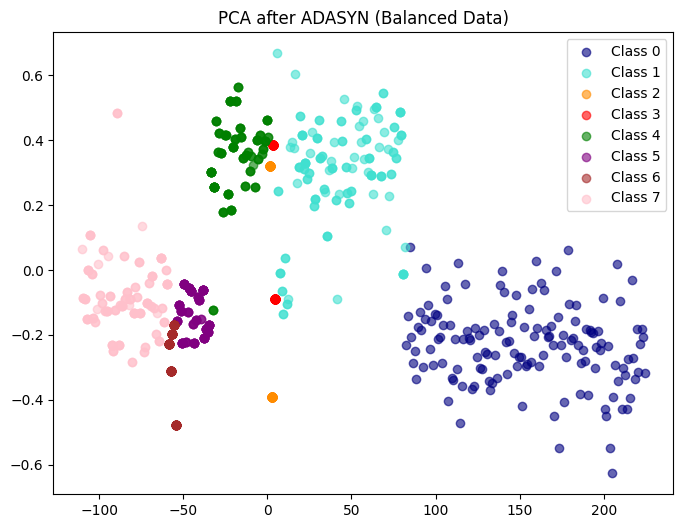

In [ ]:
X_res_pca = PCA(n_components=2).fit_transform(X_res)

plt.figure(figsize=(8,6))

colors = ["navy", "turquoise", "darkorange", "red", "green", "purple", "brown", "pink"]

for color, i, target_name in zip(colors, range(len(np.unique(y_res))), np.unique(y_res)):
    plt.scatter(
        X_res_pca[y_res == i, 0],
        X_res_pca[y_res == i, 1],
        alpha=0.6,
        color=color,
        label=f"Class {i}"
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA after ADASYN (Balanced Data)")
plt.show()


# 6. Menandai Data yang Sudah diADASYN

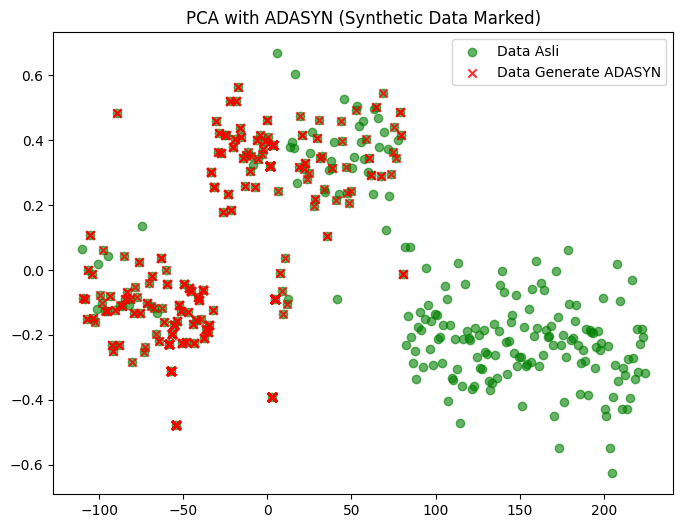

In [ ]:
X_new = X_res[len(X):]
y_new = y_res[len(y):]

X_res_pca = PCA(n_components=2).fit_transform(X_res)

plt.figure(figsize=(8,6))

plt.scatter(X_res_pca[:len(X), 0], X_res_pca[:len(X), 1],
            alpha=0.6, c='green', label='Data Asli')

plt.scatter(X_res_pca[len(X):, 0], X_res_pca[len(X):, 1],
            alpha=0.8, c='red', marker='x', label='Data Generate ADASYN')

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA with ADASYN (Synthetic Data Marked)")
plt.show()
